## 1. 필요한 패키지 로드

In [16]:
# Local Feature Stencil Code
# Written by James Hays for CS 143 @ Brown / CS 4476/6476 @ Georgia Tech with Henry Hu <henryhu@gatech.edu>
# Edited by James Tompkin
# Adapted for python by asabel and jdemari1 (2019)
# Modified by Soochahn Lee for Computer Vision coarse, School of Electrical Engineering, Kookmin University

import csv
import sys
import argparse
import numpy as np
import scipy.io as scio

import matplotlib
#matplotlib.use("TkAgg")
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from skimage import io, filters, feature, img_as_float32
from skimage.transform import rescale
from skimage.color import rgb2gray

import student as student
import visualize
from helpers import cheat_interest_points, evaluate_correspondence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. 실험용 데이터 파일 로딩 함수 정의

해당 함수는 실험용 영상의 쌍을 읽어들이고 적절하게 포맷을 조정하는 코드와, 해당 영상 쌍에 대한 특징점 정합의 참값 데이터를 읽어들이는 코드로 구성됨

In [17]:
# This function loads preassigned images and data for test cases
def load_data(file_name):
    """
     1) Load stuff
     There are numerous other image sets in the supplementary data on the
     project web page. You can simply download images off the Internet, as
     well. However, the evaluation function at the bottom of this script will
     only work for three particular image pairs (unless you add ground truth
     annotations for other image pairs). It is suggested that you only work
     with the two Notre Dame images until you are satisfied with your
     implementation and ready to test on additional images. A single scale
     pipeline works fine for these two images (and will give you full credit
     for this project), but you will need local features at multiple scales to
     handle harder cases.

     If you want to add new images to test, create a new elif of the same format as those
     for notre_dame, mt_rushmore, etc. You do not need to set the eval_file variable unless
     you hand create a ground truth annotations. To run with your new images use
     python main.py -p <your file name>.

    :param file_name: string for which image pair to compute correspondence for

        The first three strings can be used as shortcuts to the
        data files we give you

        1. notre_dame
        2. mt_rushmore
        3. e_gaudi

    :return: a tuple of the format (image1, image2, eval file)
    """
    # Note: these files default to notre dame, unless otherwise specified
    image1_file = "../data/NotreDame/NotreDame1.jpg"
    image2_file = "../data/NotreDame/NotreDame2.jpg"

    eval_file = "../data/NotreDame/NotreDameEval.mat"

    if file_name == "notre_dame":
        pass
    elif file_name == "mt_rushmore":
        image1_file = "../data/MountRushmore/Mount_Rushmore1.jpg"
        image2_file = "../data/MountRushmore/Mount_Rushmore2.jpg"
        eval_file = "../data/MountRushmore/MountRushmoreEval.mat"
    elif file_name == "e_gaudi":
        image1_file = "../data/EpiscopalGaudi/EGaudi_1.jpg"
        image2_file = "../data/EpiscopalGaudi/EGaudi_2.jpg"
        eval_file = "../data/EpiscopalGaudi/EGaudiEval.mat"

    image1 = img_as_float32(io.imread(image1_file))
    image2 = img_as_float32(io.imread(image2_file))

    return image1, image2, eval_file

## 3. 실험용 영상 설정 

본 notebook에서 아래 셀은 학생 여러분이 직접 아래 세 가지 중 입력을 하도록 변경해야 함
   1. notre_dame
   2. mt_rushmore
   3. e_gaudi

반드시 영상 쌍을 세 종류 모두에 대해 실험하고 결과를 도출하도록 함

In [18]:
# (0) SET TEST PAIR NAME
#   EITHER "notre_dame", "mt_rushmore", or "e_gaudi"
pair_name = "notre_dame"  # <-- YOU CAN CHANGE THIS

## 4. 영상 로드

In [19]:
# (1) Load and resizes images
image1_color, image2_color, eval_file = load_data(pair_name)

# Let's work with grayscale images.
image1 = rgb2gray(image1_color)
image2 = rgb2gray(image2_color)

# make images smaller to speed up the algorithm. This parameter
# gets passed into the evaluation code, so don't resize the images
# except for changing this parameter - We will evaluate your code using
# scale_factor = 0.5, so be aware of this
scale_factor = 0.5

# Bilinear rescaling
image1 = np.float32(rescale(image1, scale_factor))
image2 = np.float32(rescale(image2, scale_factor))
print(image1.shape)
print(image2.shape)

# width and height of each local feature, in pixels
feature_width = 16

(1024, 768)
(1016, 762)


## 5. 특징점 도출

Getting interest points...


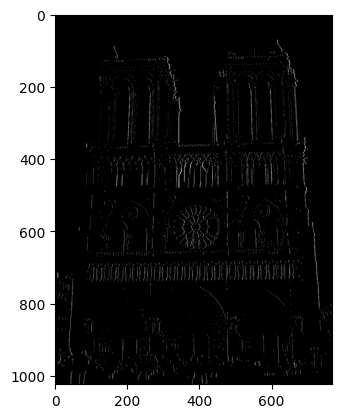

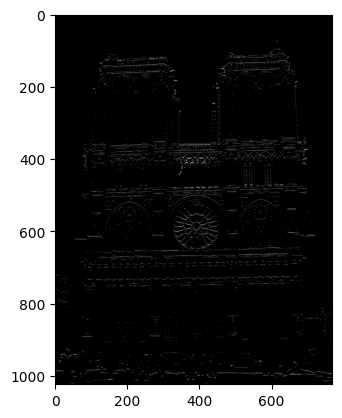

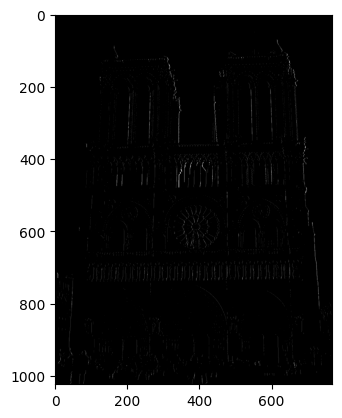

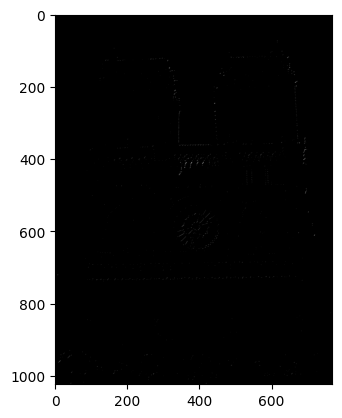

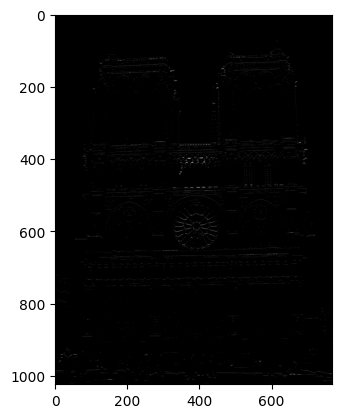

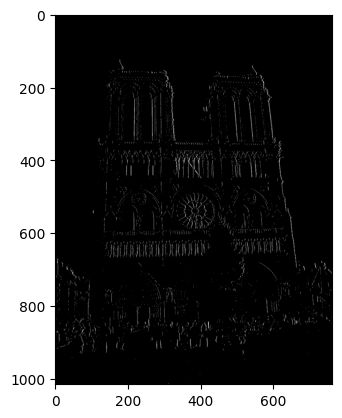

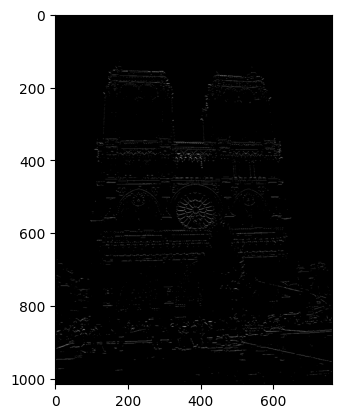

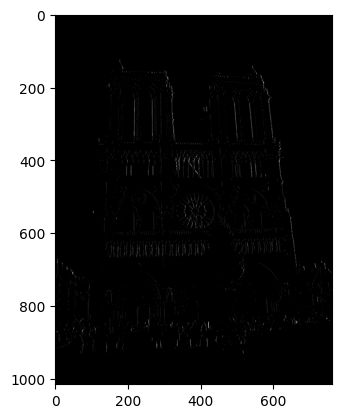

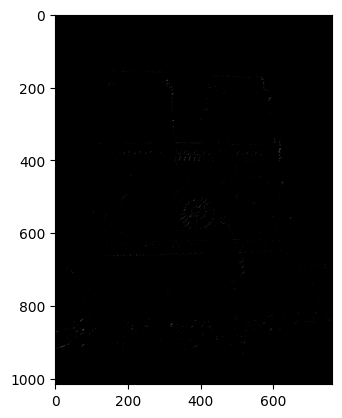

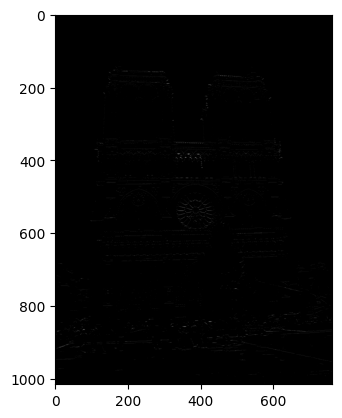

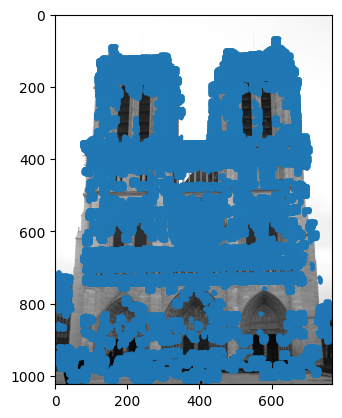

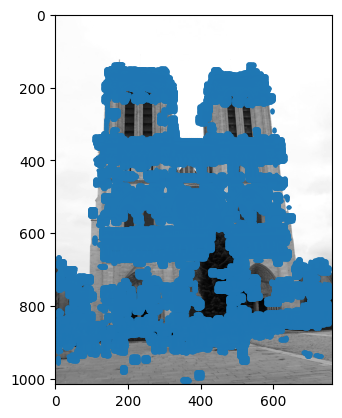

Done!


In [20]:
# (you code this)
# (2) Find distinctive points in each image. See Szeliski 4.1.1
# !!! You will need to implement get_interest_points. !!!
%matplotlib inline

print("Getting interest points...")

(x1, y1) = student.get_interest_points(image1,feature_width)
(x2, y2) = student.get_interest_points(image2,feature_width)

# For development and debugging you can compare with the ta ground truth points
# by uncommenting the following lines.
# Note that the ground truth points for mt. rushmore will not produce good results.

# (x1, y1, x2, y2) = cheat_interest_points(eval_file, scale_factor)

# view your corners!

plt.imshow(image1, cmap="gray")
plt.scatter(x1, y1, alpha=0.9, s=3)
plt.show()

plt.imshow(image2, cmap="gray")
plt.scatter(x2, y2, alpha=0.9, s=3)
plt.show()

print("Done!")

In [21]:
# image visualizing function
def show_img(img : np.array) -> None:
    img = (img - (img.min()))/(img.max() - img.min())
    plt.imshow(img, cmap="gray")
    plt.show() # 0 ~ 255

**이미지 시각화**
- 위의 이미지 시각화 함수를 잘 알아두자
- Min-Max Normalizatiion을 이용한 것이다
- 이미지마다 제각각의 픽셀 값의 범위를 갖고 있을 경우, 이를 이미지의 최대, 최소 픽셀값을 이용하여 [0, 1]사이의 값으로 통일시켜준 것이다!

**특징점 추출 결과**
- 위의 이미지 시각화함수를 통해 I_x, I_y, I_xx, I_xy, I_yy모두 출력해보았다
- 또한, 결과적으로 찾아진 image1과 image2에 대한 특징점들을 시각화하면 위의 마지막 2사진과 같다

## 6. 특징 기술자 생성

In [22]:
# (you code this)
# 3) Create feature vectors at each interest point. Szeliski 4.1.2
# !!! You will need to implement get_features. !!!

print("Getting features...")

print(x1)
print(x2)
image1_features = student.get_features(image1, x1, y1, feature_width)
image2_features = student.get_features(image2, x2, y2, feature_width)

print(image1_features)
print("Done!")

Getting features...
[604 605 606 ... 423 424 425]
[168 169 170 ... 366 367 368]
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.2 0.  0.  ... 0.  0.  0. ]
 [0.2 0.  0.  ... 0.  0.  0. ]
 [0.2 0.  0.  ... 0.  0.  0. ]]
Done!


## 7. 특징점 정합

In [23]:
# (you code this)
# 4) Match features. Szeliski 4.1.3
# !!! You will need to implement match_features !!!

print("Matching features...")

matches, confidences = student.match_features(image1_features, image2_features)

print("Done!")

Matching features...


KeyboardInterrupt: 

In [ ]:
def show_img(img : np.array) -> None:
    img = (img - (img.min()))/(img.max() - img.min())
    plt.imshow(img)
    plt.show() # 0 ~ 255

## 8. 참값 데이터를 기반으로 도출된 결과의 성능 검증

Matches: 1
Accuracy on all matches: 0%
Vizualizing...


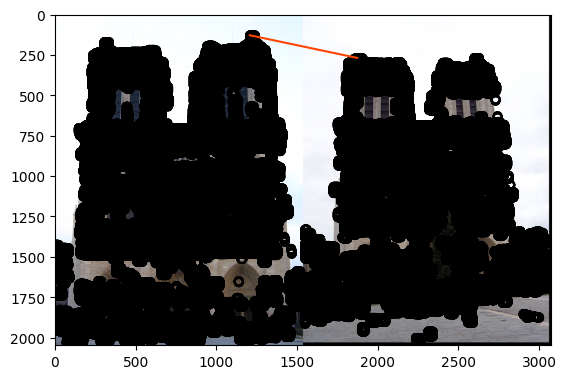

(0, 0, 0)

In [ ]:
# 5) Evaluation and visualization

# The last thing to do is to check how your code performs on the image pairs
# we've provided. The evaluate_correspondence function below will print out
# the accuracy of your feature matching for your 50 most confident matches,
# 100 most confident matches, and all your matches. It will then visualize
# the matches by drawing green lines between points for correct matches and
# red lines for incorrect matches. The visualizer will show the top
# num_pts_to_visualize most confident matches, so feel free to change the
# parameter to whatever you like.

print("Matches: " + str(matches.shape[0]))

num_pts_to_visualize = 50

evaluate_correspondence(image1_color, image2_color, eval_file, scale_factor,
    x1, y1, x2, y2, matches, confidences, num_pts_to_visualize, pair_name + '_matches.jpg')